# Contact with Spiral Torus

玉とSpiral Torusの接触点は，フレネ座標系の平面上に乗るのか．また，接触楕円の長径も平面に乗るのか．2つのSpiral Torusで挟んだ玉は，どこで力の釣り合いがとれるのか．これらについて検証する．


In [14]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection


In [16]:
import sys
import pathlib
import os
sys.path.append(str(pathlib.Path(os.path.abspath('')).resolve().parent.parent))
from IPython.display import display, HTML

from _9_Mechanics.Spiral import Spiral


In [31]:
R = 6.35 / 2
Rg = R * 1.08
dR = R * 0.08 / np.sqrt(2)
PCR = 20.875
SP0 = Spiral(alp=np.deg2rad(0e-5), l=10.0, r=PCR, eta=np.array([-dR, -dR]), R=Rg)


In [32]:
def plot_2d_mesh(x, y, xl='', yl=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(x, y)
    ax.set_aspect('equal', adjustable='box')

    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    plt.gca().add_collection(LineCollection(segs1))
    plt.gca().add_collection(LineCollection(segs2))
    plt.xlabel(xl)
    plt.ylabel(yl)
    return ax


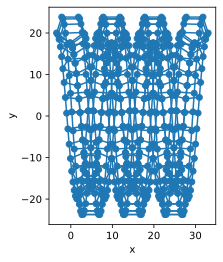

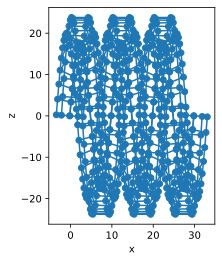

In [33]:
th = np.deg2rad(np.linspace(0, 1080, int(1e2)))
alp = np.deg2rad(np.linspace(0, 360, int(6)))

xyz = SP0.get_mesh(th, alp)

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,2], 'x', 'z')
plt.show()


dth = 0.014472077412736654
dalp = 0.013299400564331869


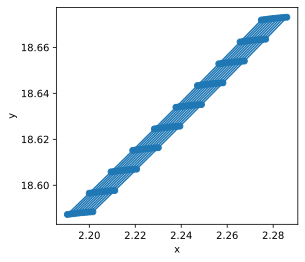

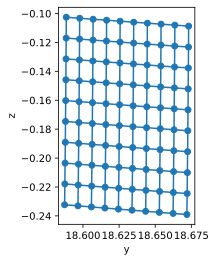

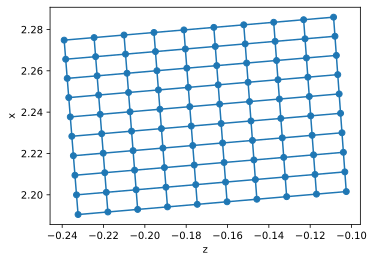

In [34]:
th = np.deg2rad(np.linspace(-0.2, 0.2, int(1e1)))
alp = np.deg2rad(np.linspace(44, 46, int(1e1)))

xyz = SP0.get_mesh(th, alp)
print('dth = '  + str(np.linalg.norm(xyz[1,0,:] - xyz[0,0,:])))
print('dalp = ' + str(np.linalg.norm(xyz[0,1,:] - xyz[0,0,:])))

fig = plot_2d_mesh(xyz[:,:,0], xyz[:,:,1], 'x', 'y')
fig = plot_2d_mesh(xyz[:,:,1], xyz[:,:,2], 'y', 'z')
fig = plot_2d_mesh(xyz[:,:,2], xyz[:,:,0], 'z', 'x')
plt.show()

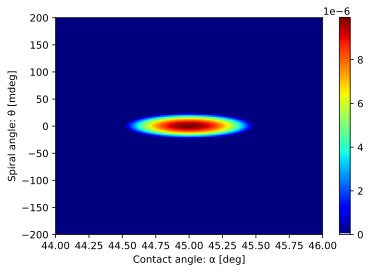

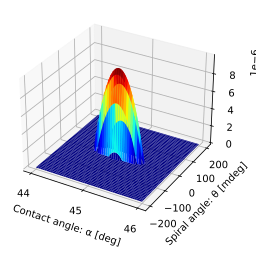

In [37]:
th = np.deg2rad(np.linspace(-0.2, 0.2, int(1e2)))
alp = np.deg2rad(np.linspace(44, 46, int(1e2)))

xyz = SP0.get_mesh(th, alp)

# x_ball = SP0.to_xyz(np.array([0., 0., 0.]))
x_ball = np.array([0., PCR, 0.])
R_ball = R + 1e-5

Disp_xyz = x_ball - xyz
Disp = R_ball - np.sqrt(Disp_xyz[:,:,0]**2 + Disp_xyz[:,:,1]**2 + Disp_xyz[:,:,2]**2)
Disp[Disp<0.0] = 0.0

plt.imshow(Disp, cmap=cm.jet, extent=np.rad2deg([alp[0], alp[-1], 1e3 *th[0], 1e3 *th[-1]]), aspect='auto')
plt.xlabel('Contact angle: α [deg]')
plt.ylabel('Spiral angle: θ [mdeg]')
plt.colorbar()
plt.show()

Th, Alp = np.meshgrid(th, alp)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(np.rad2deg(Alp), 1e3 * np.rad2deg(Th), Disp.T, cmap=cm.jet)
ax.set_xticks([44, 45, 46])
ax.set_xlabel('Contact angle: α [deg]')
ax.set_ylabel('Spiral angle: θ [mdeg]')
plt.show()


Center Contact angle: α = 44.999954919505875 [deg]
Center Spiral angle:  θ = -8.002264094439286e-06 [mdeg]


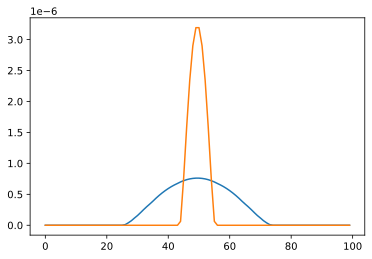

In [38]:
plt.plot(np.mean(Disp, axis=0))
plt.plot(np.mean(Disp, axis=1))

print('Center Contact angle: α = ' + str(np.rad2deg(alp @ np.mean(Disp, axis=0) / np.mean(Disp, axis=0).sum())) + ' [deg]')
print('Center Spiral angle:  θ = ' + str(1e3 * np.rad2deg(th @ np.mean(Disp, axis=1) / np.mean(Disp, axis=1).sum())) + ' [mdeg]')

# 結論

- 螺旋チューブ表面と、ある任意の点との距離を求めた。ここでは代数的には取り扱わず、あくまで1代表例のみの計算である。
- 螺旋チューブと玉の交点は、螺旋中心に垂直な平面上でよく表すことができる。
- 螺旋は曲率と捩率をもつ最もシンプルな数学表現である。これで螺旋中心、玉中心、接触点、接触楕円長径が同一平面に乗るということは、トーラス（ここでは単位円周の直積集合の意）との接触を考えるには、まずトーラス中心を求める必要があることが示唆される。
